## EMPLOYEE ATTRITION DATASET
- ATTRITION:Employee attrition is the gradual reduction of a workforce as employees leave due to retirement, resignation, or termination, often without immediate replacement, leading to a smaller overall headcount, unlike turnover which may maintain size.
- Today we are exploring the causes of employee attrition.
- Through data analysis we will be able to understand whats causing the attrition and come up with solutions to mitigate it .
- machine learning models will be essential as to catch the early attrition.

## 1. IMPORT THE LIBRARIES


In [6]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

## 2. LOAD THE DATA

In [7]:
# load the data using pandas
from google.colab import files
upload = files.upload()


Saving WA_Fn-UseC_-HR-Employee-Attrition.csv to WA_Fn-UseC_-HR-Employee-Attrition.csv


In [8]:
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
data.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## 3. EXPLORATORY DATA ANALYSIS(EDA)

In [9]:
# Check for data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

- The dataset has 26 intergers and 9 string objects

In [10]:
# check for the shape of the data
data.shape

(1470, 35)

-  The data has 1470 rows and 35 columns

In [11]:
# check for the numerical statistics
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## 4. UNIVARIATE ANALYSIS

# **univariate analysis of categorical data **


In [12]:
# find the categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
categorical_columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

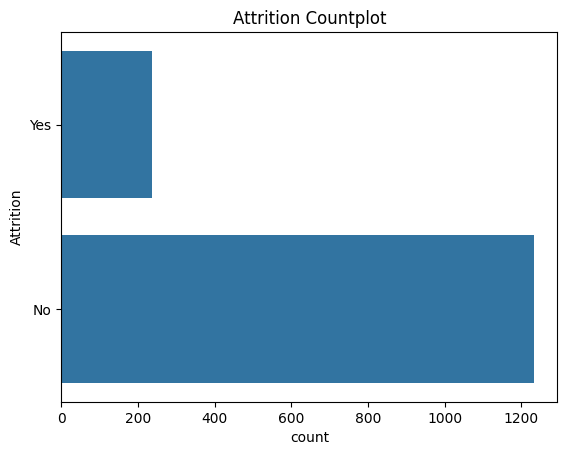

In [13]:
# use countplot to analyse the categorica values
sns.countplot(data['Attrition'])
plt.title('Attrition Countplot')
plt.show()

- This shows the accurences of each plot in this case the no  the level of attition is 1200 employess .
- While the yes is around 200 employees

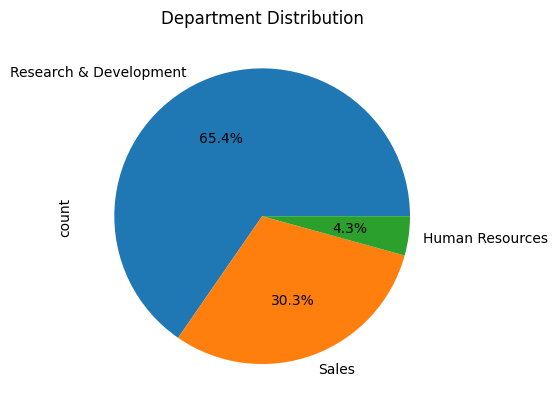

In [14]:
# the pie chart distibution per department
data['Department'].value_counts().plot(autopct='%1.1f%%', kind='pie')
plt.title('Department Distribution')
plt.show()

- Different departments have different distribution with research and development having the highest percentage at 65.4 %
- Human resource departments has the lowest distribution at 4.3%
- Sales department has 30.3% of  the total dataset distribution

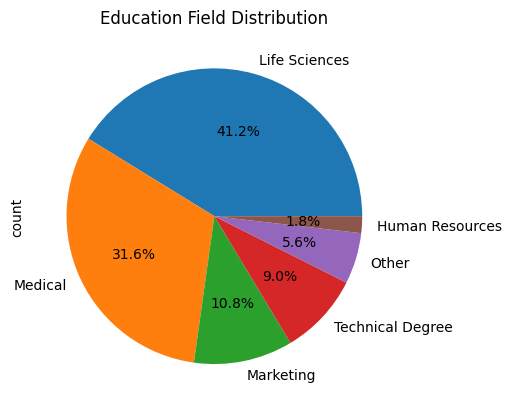

In [15]:
# the distribution of education field
data['EducationField'].value_counts().plot(autopct='%1.1f%%', kind='pie')
plt.title('Education Field Distribution')
plt.show()

- The data above shows  the distribution of employees  education  
- life sciences has the highest field
- Human Resources has the lowest field distribution

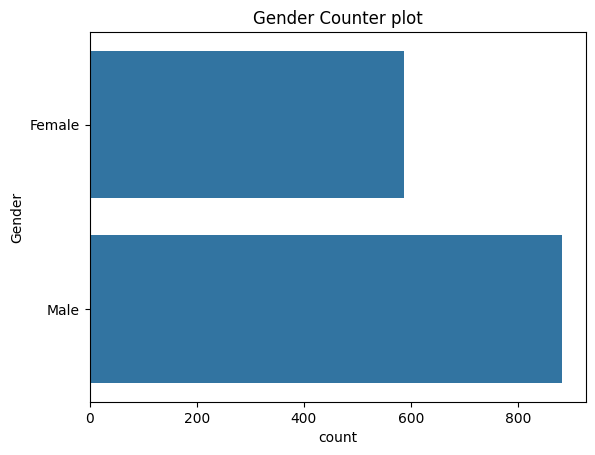

In [16]:
# A count plot for the gender
sns.countplot(data['Gender'])
plt.title('Gender Counter plot')
plt.show()

- There are more male employees than female employess .

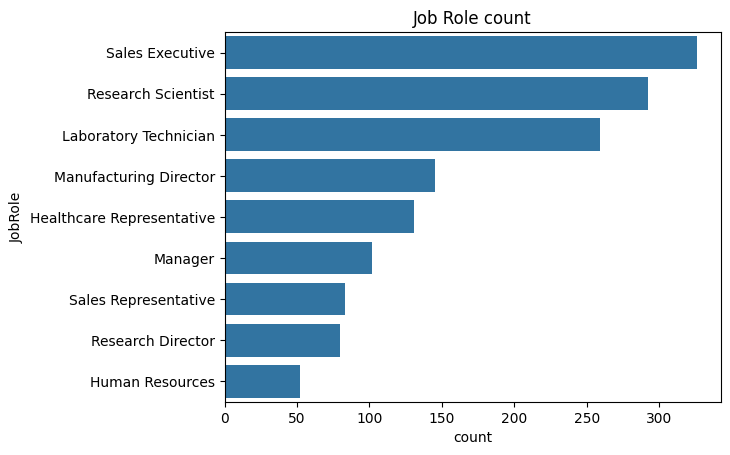

In [17]:
# countplot for jobrole
sns.countplot(data['JobRole'])
plt.title('Job Role count')
plt.show()

- Sale Executive has the most number of employess followed by research scientist .
- Human Resource has the lowest at 50 employees

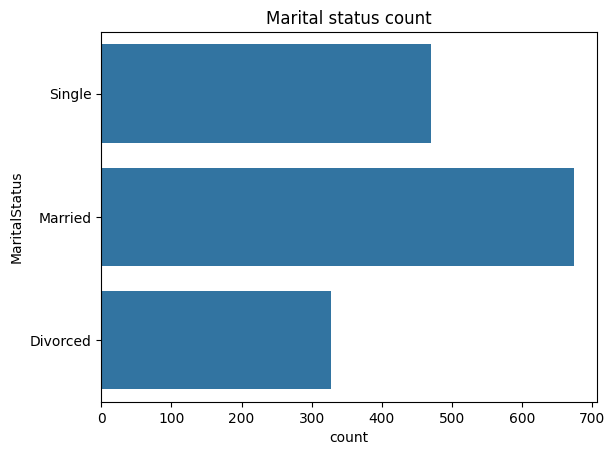

In [18]:
# a countplot for marital status
sns.countplot(data['MaritalStatus'])
plt.title('Marital status count')
plt.show()

- Most of the employees are married

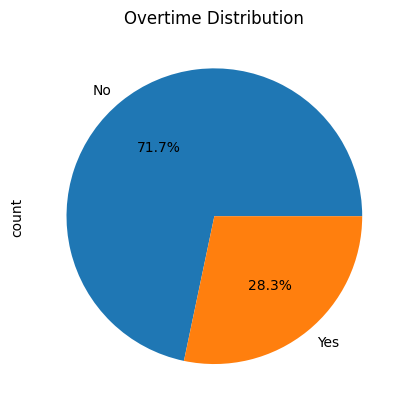

In [19]:
# a pie chart for overtime
data['OverTime'].value_counts().plot(autopct = '%1.1f%%', kind='pie')
plt.title('Overtime Distribution')
plt.show()

- Most of the employees dont work overtime

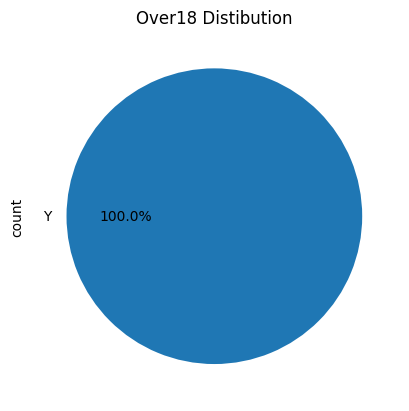

In [20]:
# over18 distibution
data['Over18'].value_counts().plot(autopct = '%1.1f%%', kind='pie')
plt.title('Over18 Distibution')
plt.show()

- Everyone is over 18


#### UNIVARIATE ANALYSIS OF NUMERICAL DATA

In [21]:
# Check the numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
numerical_columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

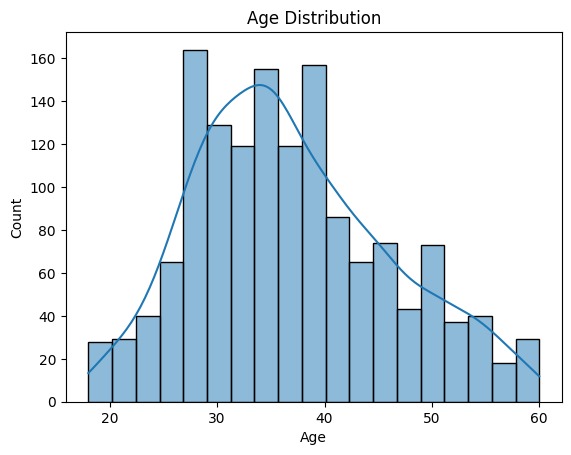

In [22]:
# check the  for  age distibution
sns.histplot(data['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

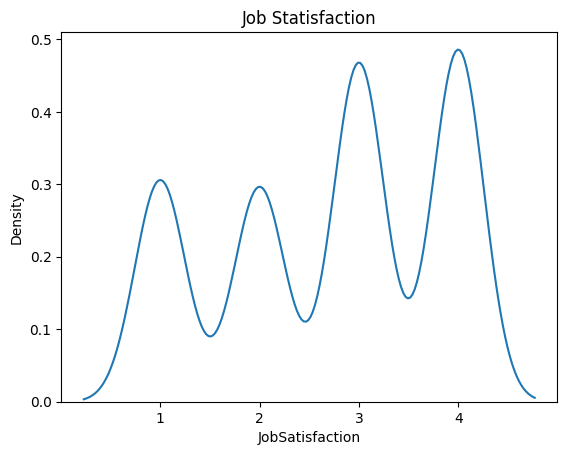

In [23]:
# A kde plot for job statisfaction
sns.kdeplot(data['JobSatisfaction'])
plt.title('Job Statisfaction')
plt.show()

In [24]:
# numerical distribution
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### . Bivariate analyisis

In [27]:
# The  average distribution of age and sex
data.groupby('Gender')['Age'].mean()

,Age
Gender,
Female,37.329932
Male,36.653061


- The average mean of age of women employees is 37 year
- The average age of men Employees is 36 years

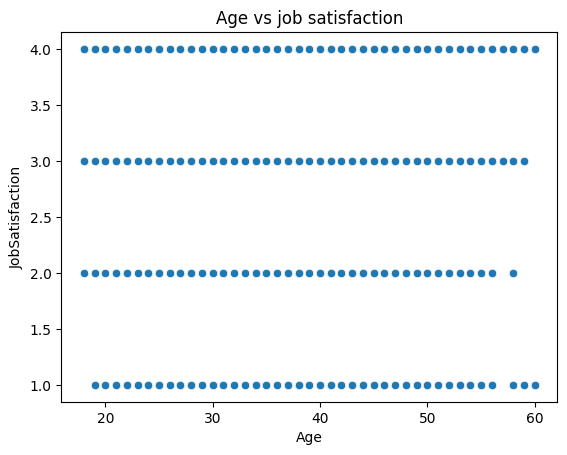

In [32]:
# bivariate analysis
sns.scatterplot( x= data['Age'],y= data['JobSatisfaction'])
plt.title('Age vs job satisfaction')
plt.show()

# checking for correlation

In [33]:
# checking for correlation in reference to  target variable
# 1. Map your categorical target to binary integers
data['Attrition'] = data['Attrition'].map({'No': 0, 'Yes': 1})

# 2. Check correlation with all numerical features
# Sorting helps you see the strongest relationships instantly
correlations = data.corr(numeric_only=True)['Attrition'].sort_values(ascending=False)
print(correlations)


Attrition                   1.000000
DistanceFromHome            0.077924
NumCompaniesWorked          0.043494
MonthlyRate                 0.015170
PerformanceRating           0.002889
HourlyRate                 -0.006846
EmployeeNumber             -0.010577
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
Age                        -0.159205
MonthlyIncome              -0.159840
YearsInCurrentRole         -0.160545
JobLevel                   -0.169105
TotalWorkingYears          -0.171063
EmployeeCount                    NaN
StandardHours                    NaN
N

JobSatisfaction (-0.103): Higher job satisfaction is associated with lower attrition.

EnvironmentSatisfaction (-0.103): Employees satisfied with their work environment are less likely to leave.

WorkLifeBalance (-0.064): Better work–life balance slightly reduces attrition.

TrainingTimesLastYear (-0.059): More training opportunities are linked to lower attrition.

DailyRate (-0.057): Shows a minor negative effect on attrition.

RelationshipSatisfaction (-0.046): Positive workplace relationships reduce the likelihood of leaving.
DistanceFromHome (0.078): Employees who live farther from the workplace are slightly more likely to leave.

NumCompaniesWorked (0.043): Employees who have worked at more companies show a marginally higher likelihood of attrition.

MonthlyRate (0.015): Shows an almost negligible relationship with attrition.

Employee count  and standard working hours have no correlation


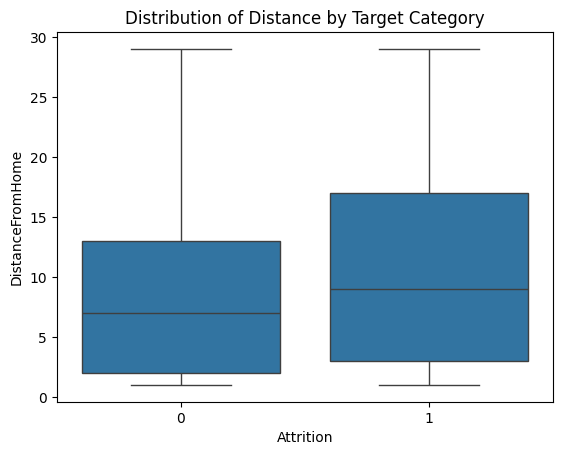

In [37]:
# Replace 'target_column' with your original categorical column name
sns.boxplot(x=data['Attrition'], y=data['DistanceFromHome'])
plt.title('Distribution of Distance by Target Category')
plt.show()


- Distance from home has weak possitive correlation however it still contributes to employees attrition

In [43]:
from scipy.stats import chi2_contingency
# Create contingency table
contingency_table = pd.crosstab(data['OverTime'], data['Attrition'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

chi2, p


(np.float64(87.56429365828768), np.float64(8.15842372153832e-21))

### Chi-Square Test Result

The Chi-Square test produced a statistic of **87.56** with a p-value of **8.16 × 10⁻²¹**. Since the p-value is far below the 0.05 significance level, the null hypothesis of independence is rejected. This indicates a statistically significant association between the categorical variable and employee attrition. Therefore, attrition rates vary meaningfully across the categories of this feature.


In [77]:
# encode categorical variables
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

binary_cols = ['Attrition', 'OverTime', 'Gender','Over18']

for col in binary_cols:
    data[col] = le.fit_transform(data[col])


In [78]:
nominal_cols = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']

# Check which columns are actually present to avoid future KeyErrors
existing_cols = [col for col in nominal_cols if col in data.columns]
missing_cols = list(set(nominal_cols) - set(existing_cols))

if missing_cols:
    print(f"Warning: These columns were not found: {missing_cols}")

# Apply encoding only to columns that exist
data = pd.get_dummies(data, columns=existing_cols, drop_first=True)


In [79]:
#  Define the independent and dependent variables
X = data.drop(['Attrition'], axis=1)
y = data['Attrition']

In [80]:
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2, random_state=42)


In [81]:
# fit the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [82]:
y_pred = model.predict(X_test)

In [83]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       255
           1       0.00      0.00      0.00        39

    accuracy                           0.87       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.75      0.87      0.81       294



- The model has an accuracy of 87%
- The model performed relatively well  on the  true negatives. meaning the model could predict the likely hood of an attrition
- The model could not predict any of the true positives meaning the model could not predict no attrition.